In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv", sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

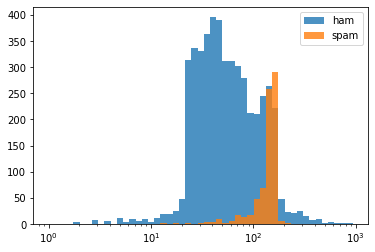

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

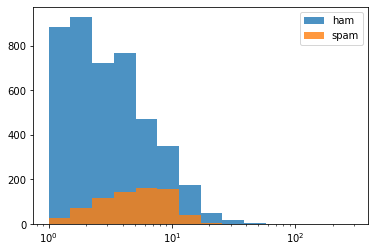

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# X feature data
X = df[['length','punct']]
# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [14]:
X_train.shape

(3900, 2)

In [15]:
X_test.shape

(1672, 2)

In [16]:
y_test.shape

(1672,)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model = LogisticRegression(solver='lbfgs')

In [19]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [20]:
from sklearn import metrics

In [21]:
predictions = lr_model.predict(X_test)

In [23]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [25]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

df

,ham,spam
ham,1404,44
spam,219,5


In [26]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [27]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

df

,ham,spam
ham,1438,10
spam,224,0


In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [30]:
from sklearn.svm import SVC

scv_model = SVC(gamma='auto')

scv_model.fit(X_train,y_train)

predictions = scv_model.predict(X_test)

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

df

,ham,spam
ham,1373,75
spam,121,103


Text Feature Extraction - Code Along Implementations

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv("./UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv", sep='\t')

In [33]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [35]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [36]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# X feature data
X = df['message']
# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vectorizer = TfidfVectorizer()

In [52]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [53]:
from sklearn.svm import LinearSVC

In [54]:
clf = LinearSVC()

In [55]:
clf.fit(X_train_tfidf, y_train)

LinearSVC()

Remplace toute les étapes du dessus par une seule ligne de code.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [57]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [60]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [61]:
predictions = text_clf.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
print(confusion_matrix(y_test,predictions))

[[1445    3]
 [  10  214]]


In [64]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

df

,ham,spam
ham,1445,3
spam,10,214


In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [66]:
from sklearn import metrics

In [67]:
metrics.accuracy_score(y_test,predictions)

0.9922248803827751

In [68]:
text_clf.predict(["Hi, how are you doing today my baby ?"])

array(['ham'], dtype=object)

In [69]:
text_clf.predict(["Congratulations ! You've been selected as a winner. TEXT WON to 44255 congratulations free entry to contest."])

array(['spam'], dtype=object)

Reprise à zéro sur des critique de films

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./UPDATED_NLP_COURSE/TextFiles/moviereviews.tsv", sep='\t')

In [5]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [8]:
len(df)

2000

In [10]:
print(df['review'][0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [12]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [18]:
blanks = []

# (index, label, rewiev)
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [19]:
df.drop(blanks,inplace=True)

In [20]:
len(df)

1938

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = df['review']

In [24]:
y = df['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [27]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])

In [28]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [29]:
predictions = text_clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
df = pd.DataFrame(confusion_matrix(y_test,predictions),index=['neg','pos'],columns=['neg','pos'])

df

,neg,pos
neg,259,49
pos,49,283


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [34]:
print(accuracy_score(y_test, predictions))

0.846875


Examen pour voir si j'ai bien capter le truc

